In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

#### Data Importation

In [28]:
data=pd.read_excel("C:/Users/Elaineyan/Desktop/Github/Ficticious Data.xlsx")

#### Check data samples

In [216]:
data.head(10)

,ServiceFromLastDayofMonth,BeneficaryID,RenderingProviderPayeeID,ProcedureCode,Diagnosis,DateofServiceCount,ProviderPaidAmt,NumberofUnits,RenderingProviderID,UnitPrice,year,month
254,2009-10-31,999990070,71,11720,703.80,3,"2,629.44",180,22137,14.61,2009,10
247,2009-08-31,999990054,55,11720,703.80,3,"2,684.16",180,22121,14.91,2009,8
249,2009-09-30,999990061,62,11720,703.80,3,"2,684.16",180,22128,14.91,2009,9
242,2009-07-31,999990043,44,11720,703.80,3,"2,684.73",180,22110,14.92,2009,7
243,2009-07-31,999990044,45,11720,703.80,3,"2,684.73",180,22111,14.92,2009,7
244,2009-07-31,999990047,48,11720,703.80,3,"2,684.73",180,22114,14.92,2009,7
245,2009-07-31,999990048,49,11720,703.80,3,"2,684.73",180,22115,14.92,2009,7
246,2009-07-31,999990051,52,11720,703.80,3,"2,684.73",180,22118,14.92,2009,7
248,2009-08-31,999990055,56,11720,703.80,3,"2,684.73",180,22122,14.92,2009,8
250,2009-09-30,999990063,64,11720,703.80,3,"2,684.73",180,22130,14.92,2009,9


#### Data structure overview: 9 columns with 275 rows

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 254 to 138
Data columns (total 12 columns):
ServiceFromLastDayofMonth    275 non-null datetime64[ns]
BeneficaryID                 275 non-null int64
RenderingProviderPayeeID     275 non-null int64
ProcedureCode                275 non-null object
Diagnosis                    259 non-null float64
DateofServiceCount           275 non-null int64
ProviderPaidAmt              275 non-null float64
NumberofUnits                275 non-null int64
RenderingProviderID          275 non-null int64
UnitPrice                    275 non-null float64
year                         275 non-null int64
month                        275 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 37.9+ KB


#### Check the missings values: out of 275 entries, Diagnosis has 16 missing data; no missing for all other variables

In [218]:
print(data.isnull().sum())

ServiceFromLastDayofMonth     0
BeneficaryID                  0
RenderingProviderPayeeID      0
ProcedureCode                 0
Diagnosis                    16
DateofServiceCount            0
ProviderPaidAmt               0
NumberofUnits                 0
RenderingProviderID           0
UnitPrice                     0
year                          0
month                         0
dtype: int64


#### To clean column names: extra space to be removed. 

In [219]:
data.columns

Index(['ServiceFromLastDayofMonth', 'BeneficaryID', 'RenderingProviderPayeeID',
       'ProcedureCode', 'Diagnosis', 'DateofServiceCount', 'ProviderPaidAmt',
       'NumberofUnits', 'RenderingProviderID', 'UnitPrice', 'year', 'month'],
      dtype='object')

In [220]:
data.columns = data.columns.str.replace(' ', '')   #To remove space from data column names; 
data.columns

Index(['ServiceFromLastDayofMonth', 'BeneficaryID', 'RenderingProviderPayeeID',
       'ProcedureCode', 'Diagnosis', 'DateofServiceCount', 'ProviderPaidAmt',
       'NumberofUnits', 'RenderingProviderID', 'UnitPrice', 'year', 'month'],
      dtype='object')

#### Frequency check of all variables (except ID and payment amount variables).

In [221]:
for c in data.columns:
    if c not in ['BeneficaryID', 'RenderingProviderPayeeID', 'ProviderPaidAmt', 'RenderingProviderID']:
        print(data[c].value_counts())
        print('\n')

2009-01-31    75
2009-02-28    44
2009-12-31    23
2010-03-31    20
2009-07-31    14
2010-06-30    13
2009-09-30    13
2010-07-31    11
2009-06-30    11
2009-03-31    10
2009-04-30    10
2009-10-31     9
2010-04-30     8
2009-05-31     4
2010-05-31     3
2009-08-31     3
2009-11-30     2
2010-01-31     2
Name: ServiceFromLastDayofMonth, dtype: int64


99213    55
11720    33
92980    28
J2357    26
99245    24
99214    23
99309    14
99308    13
99307    12
99310    12
99244    10
99347    10
99348     7
99243     4
99341     2
99343     1
99304     1
Name: ProcedureCode, dtype: int64


703.80    33
410.01    28
428.00    27
493.30    26
404.01    22
410.32    17
250.76    16
401.90    15
290.20    14
250.00    13
249.11    12
290.40    12
250.63    10
290.21     8
412.00     4
300.01     1
331.00     1
Name: Diagnosis, dtype: int64


3    161
2    114
Name: DateofServiceCount, dtype: int64


180     130
270      57
120      48
90        7
225       6
150       4
135       3
60        

#### Check number of unique values for ID and payment variables: 3 ID variables are unique to the dataset, thus not relevant in this analysis. ProviderPaidAmt seems to be relevant to number of procedure units provided.

In [65]:
total=len(data.index)
for c in data.columns:
    if c in ['BeneficaryID', 'RenderingProviderPayeeID', 'ProviderPaidAmt', 'RenderingProviderID']:
        val=len(data[c].unique())
        print('Out of total {} data, unique values for variable {} is: {}'.format(total, c, val))

Out of total 275 data, unique values for variable BeneficaryID is: 275
Out of total 275 data, unique values for variable RenderingProviderPayeeID is: 275
Out of total 275 data, unique values for variable ProviderPaidAmt is: 97
Out of total 275 data, unique values for variable RenderingProviderID is: 275


#### Create new features: UnitPrice for each procedure code; year and month of service dates. 

In [ ]:
data['UnitPrice']=data['ProviderPaidAmt']/data['NumberofUnits']
data=data.sort_values(by=['ProcedureCode', 'NumberofUnits', 'UnitPrice'])
data['year']=data['ServiceFromLastDayofMonth'].dt.year
data['month']=data['ServiceFromLastDayofMonth'].dt.month

#### Check overall utilization: summary of number of patients by year and month. Only 7 months data available in 2010.

In [233]:
data.groupby(['year', 'month'])['BeneficaryID'].count()

year  month
2009  1        75
      2        44
      3        10
      4        10
      5         4
      6        11
      7        14
      8         3
      9        13
      10        9
      11        2
      12       23
2010  1         2
      3        20
      4         8
      5         3
      6        13
      7        11
Name: BeneficaryID, dtype: int64

#### Procedure level utilization: summary of number of procedures units occurred each month

In [231]:
data.groupby(['ProcedureCode', 'year', 'month'])['NumberofUnits'].sum()

ProcedureCode  year  month
11720          2009  6         270
                     7        3280
                     8         630
                     9        3060
                     10        360
92980          2009  12       1251
               2010  1         540
                     3        4440
99213          2009  1         600
                     4         360
                     5         900
                     6        3510
               2010  4        1516
                     5         630
                     6        3780
                     7        2070
99214          2009  1         720
                     2         390
                     3        1983
                     4        1620
99243          2009  1         690
99244          2009  1        1382
99245          2009  1        4074
99304          2009  1         120
99307          2009  1        1860
99308          2009  1        2100
99309          2009  1         540
                     2      

#### Number of unique diagnosis code associated with each procedure code: most procedure code associated with only 1 diagnosis code.

In [232]:
data.groupby(['ProcedureCode', 'year'])['Diagnosis'].nunique()

ProcedureCode  year
11720          2009    1
92980          2009    1
               2010    1
99213          2009    4
               2010    2
99214          2009    1
99243          2009    1
99244          2009    1
99245          2009    2
99304          2009    1
99307          2009    1
99308          2009    2
99309          2009    3
99310          2009    2
99341          2009    2
99343          2009    1
99347          2009    1
99348          2009    1
J2357          2009    1
Name: Diagnosis, dtype: int64

#### Overall ditribution of the procedure price: procedure codes 99308, 99245, 99213, and J2357 have bigger variation in unit price than others, the min values of these codes can go down to less than 4 dollars per procedure, while majority of procedures priced around 14 dollars.

In [235]:
pd.options.display.float_format = '{:,.1f}'.format
data.groupby(['ProcedureCode'])['UnitPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
ProcedureCode,,,,,,,,
11720,33.0,14.9,0.1,14.4,14.9,14.9,14.9,15.4
92980,28.0,15.3,0.2,14.6,15.4,15.4,15.4,15.4
99213,55.0,14.9,2.3,3.7,14.8,15.8,15.8,15.8
99214,23.0,14.6,0.2,13.8,14.6,14.6,14.8,14.8
99243,4.0,14.4,0.2,14.1,14.2,14.4,14.6,14.6
99244,10.0,14.4,0.3,13.7,14.3,14.6,14.6,14.6
99245,24.0,13.8,2.2,3.7,14.0,14.6,14.6,14.6
99304,1.0,14.6,nan,14.6,14.6,14.6,14.6,14.6
99307,12.0,14.3,0.3,13.5,14.2,14.5,14.6,14.6


#### Since most procedures' prices are around 14 dollars, we look the overall distribution of procedure unit price: it re-confirms the fact that, procedure unit price less than 4 dollars may be outliers. More investigation into the price or data to be followed. 

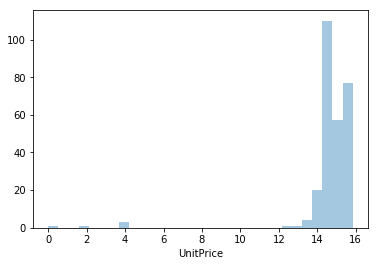

In [236]:
sns.distplot(data['UnitPrice'].dropna(), kde=False, bins=30)

#### Check the details of the data with "outlier" procedure unit price: out of 275 data samples, 6 entries might be problematic. Can either remove these 6 or conduct some drill down analysis as needed. 

In [238]:
data[data['UnitPrice']<13] 

,ServiceFromLastDayofMonth,BeneficaryID,RenderingProviderPayeeID,ProcedureCode,Diagnosis,DateofServiceCount,ProviderPaidAmt,NumberofUnits,RenderingProviderID,UnitPrice,year,month
213,2009-06-30,999990032,33,99213,250.0,3,"5,040.0",1350,12377,3.7,2009,6
212,2010-06-30,999990142,143,99213,410.3,3,"5,040.0",1350,22209,3.7,2010,6
72,2009-01-31,999990194,195,99245,249.1,2,24.5,2,31239,12.3,2009,1
95,2009-01-31,999990181,182,99245,250.8,2,"3,360.0",900,31226,3.7,2009,1
50,2009-01-31,999990218,219,99308,428.0,2,352.4,180,31263,2.0,2009,1
116,2009-10-31,999990078,79,J2357,493.3,3,0.0,135,22145,0.0,2009,10
